<a href="https://colab.research.google.com/github/ahmedtarek03/example/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark==3.5.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.5-py2.py3-none-any.whl size=317747862 sha256=341a346bbfc50ee55f695b79ad0d17171b0538229f6f6e7d7fdaecab20bdab20
  Stored in directory: /root/.cache/pip/wheels/0c/7f/b4/0e68c6d8d89d2e582e5498ad88616c16d7c19028680e9d3840
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1


In [2]:
pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.2 MB/s eta 0:00:00


In [3]:
from statsbombpy import sb
import pandas as pd

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

match_id = 7559
events = sb.events(match_id=match_id)

# what columns we have
print("Available columns in the events data:")
print(events.columns.tolist())
print("\n" + "="*80 + "\n")

# Check for missing values
print("\nMissing values per column:")
print(events.isnull().sum())
print("\n" + "="*80 + "\n")

# the distribution of event types
if 'type' in events.columns:
    print("Event type distribution:")
    print(events['type'].value_counts())
else:
    print("No 'type' column found in the data")

# prepare a sample event
print("\n" + "="*80 + "\n")
print("Preparing a sample event...")

sample_event = events.iloc[0].to_dict()

# Clean the sample event
clean_event = {}
for key, value in sample_event.items():
    if pd.isna(value):
        continue
    if hasattr(value, 'item'):
        value = value.item()
    elif hasattr(value, 'to_dict'):
        value = value.to_dict()
    clean_event[key] = value

print("\nSample event (as dict):")
print(clean_event)


Available columns in the events data:
['ball_receipt_outcome', 'ball_recovery_offensive', 'ball_recovery_recovery_failure', 'block_offensive', 'carry_end_location', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height', 'pass_length', 'pass_miscommunication', 'pass_outcome', 'pass_recipient', 'pass_recipient_id', 'pass_shot_assist', 'pass_switch', 'pass_ty

In [4]:
from statsbombpy import sb
import pandas as pd

# Load event data
match_id = 7559
events = sb.events(match_id=match_id)

# Helper to safely unpack nested dictionary fields
def unpack_nested_fields(df, parent_col, fields):
    for field in fields:
        new_col = f"{parent_col}.{field}"
        df[new_col] = df[parent_col].apply(lambda x: x.get(field) if isinstance(x, dict) else None)
    return df

# Fields to unpack
nested_fields_to_unpack = {
    'pass': ['outcome', 'goal_assist', 'shot_assist', 'angle', 'length'],
    'shot': ['outcome', 'statsbomb_xg', 'first_time', 'one_on_one'],
    'duel': ['outcome', 'type'],
    'foul_committed': ['card', 'type'],
    'interception': ['outcome'],
    'block': ['deflection'],
    'ball_recovery': ['recovery_failure'],
    'goalkeeper': ['type'],
    'dribble': ['outcome']
}

# Unpack all defined nested fields
for parent, subfields in nested_fields_to_unpack.items():
    if parent in events.columns:
        events = unpack_nested_fields(events, parent, subfields)

# Drop rows missing critical event type
events = events.dropna(subset=['type'])

# Optimize known numeric columns if they exist
type_conversions = {
    'minute': 'int16',
    'second': 'int16',
    'shot.statsbomb_xg': 'float32',
    'pass.angle': 'float32',
    'pass.length': 'float32'
}

for col, dtype in type_conversions.items():
    if col in events.columns:
        events[col] = events[col].astype(dtype)

# Sort by time
sorted_events = events.sort_values(
    by=['minute', 'second', 'timestamp'],
    ascending=True
).reset_index(drop=True)

# Display shape and sample
print(f"Sorted event data shape: {sorted_events.shape}")
print("\nSample events:")
print(sorted_events.tail(20))


Sorted event data shape: (3831, 81)

Sample events:
     ball_receipt_outcome ball_recovery_offensive  \
3811                  NaN                     NaN   
3812                  NaN                     NaN   
3813                  NaN                     NaN   
3814                  NaN                     NaN   
3815                  NaN                     NaN   
3816                  NaN                     NaN   
3817                  NaN                     NaN   
3818                  NaN                     NaN   
3819                  NaN                     NaN   
3820                  NaN                     NaN   
3821                  NaN                     NaN   
3822                  NaN                     NaN   
3823                  NaN                     NaN   
3824                  NaN                     NaN   
3825                  NaN                     NaN   
3826                  NaN                     NaN   
3827                  NaN                     N

In [5]:
from statsbombpy import sb
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=UserWarning)


match_id = 7559
events = sb.events(match_id=match_id)

# Show all available columns
print("All available columns:")
print(events.columns.tolist())
print("\n" + "="*80 + "\n")

# Identify nested columns
nested_cols = [col for col in events.columns if events[col].apply(lambda x: isinstance(x, (dict, list))).any()]


print("Unique values for FLAT columns only (non-nested):")
flat_cols = [col for col in events.columns if col not in nested_cols]

for col in flat_cols:
    unique_vals = events[col].unique()
    print(f"\nColumn: {col}")
    print(f"-> {len(unique_vals)} unique values:")
    print(unique_vals)

All available columns:
['ball_receipt_outcome', 'ball_recovery_offensive', 'ball_recovery_recovery_failure', 'block_offensive', 'carry_end_location', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height', 'pass_length', 'pass_miscommunication', 'pass_outcome', 'pass_recipient', 'pass_recipient_id', 'pass_shot_assist', 'pass_switch', 'pass_type', 'period', 

In [6]:
from statsbombpy import sb

match_id = 7559
lineups = sb.lineups(match_id=match_id)
unique_positions = set()

for team, lineup_df in lineups.items():
    for positions in lineup_df['positions']:
        if positions:
            for pos in positions:
                unique_positions.add(pos['position'])

unique_positions = sorted(unique_positions)
print(unique_positions)


['Center Attacking Midfield', 'Center Defensive Midfield', 'Center Forward', 'Goalkeeper', 'Left Back', 'Left Center Back', 'Left Center Forward', 'Left Center Midfield', 'Left Midfield', 'Left Wing', 'Right Back', 'Right Center Back', 'Right Center Forward', 'Right Center Midfield', 'Right Midfield', 'Right Wing']


In [7]:
sorted_events = sorted_events.dropna(subset=['player'])


In [8]:
# Build player_position_lookup from lineups
lineups = sb.lineups(match_id=7559)

player_position_lookup = {}
for team, lineup_df in lineups.items():
    for idx, row in lineup_df.iterrows():
        if row['positions']:
            player_position_lookup[row['player_name']] = row['positions'][0]['position']

# Map detailed position
sorted_events['player_position'] = sorted_events['player'].map(player_position_lookup)

# Map detailed to general position category
position_mapping = {
    # Goalkeeper
    'Goalkeeper': 'GK',

    # Defenders
    'Left Back': 'D',
    'Right Back': 'D',
    'Left Center Back': 'D',
    'Right Center Back': 'D',
    'Center Back': 'D',
    'Defender': 'D',

    # Midfielders
    'Center Defensive Midfield': 'MD',
    'Left Center Midfield': 'MD',
    'Right Center Midfield': 'MD',
    'Left Midfield': 'MD',
    'Right Midfield': 'MD',
    'Center Midfield': 'MD',
    'Right Wing Back': 'MD',
    'Left Wing Back': 'MD',
    'Right Defensive Midfield': 'MD',
    'Left Defensive Midfield': 'MD',
    'Midfielder': 'MD',

    # Forwards
    'Center Attacking Midfield': 'FW',
    'Left Wing': 'FW',
    'Right Wing': 'FW',
    'Center Forward': 'FW',
    'Left Center Forward': 'FW',
    'Right Center Forward': 'FW',
    'Right Attacking Midfield': 'FW',
    'Left Attacking Midfield': 'FW',
    'Striker': 'FW',
    'Secondary Striker': 'FW',
    'Forward': 'FW'
}

sorted_events['player_main_position'] = sorted_events['player_position'].map(position_mapping)


In [9]:
bool_cols = [
    "pass_goal_assist", "pass_shot_assist", "foul_won_penalty",
    "pass_switch", "foul_committed_penalty",
    "pass_aerial_won", "shot_aerial_won"
]

for col in bool_cols:
    sorted_events[col] = sorted_events[col].fillna(False).infer_objects(copy=False).astype(bool).astype(int)


<ipython-input-9-b624b55471fb>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sorted_events[col] = sorted_events[col].fillna(False).infer_objects(copy=False).astype(bool).astype(int)
<ipython-input-9-b624b55471fb>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sorted_events[col] = sorted_events[col].fillna(False).infer_objects(copy=False).astype(bool).astype(int)
<ipython-input-9-b624b55471fb>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=

In [10]:
categorical_cols = [
    "shot_outcome","shot_type","pass_outcome", "duel_type", "duel_outcome",
    "dribble_outcome", "foul_committed_card", "interception_outcome",
    "goalkeeper_type", "goalkeeper_outcome", "player_main_position","type"
]

sorted_events = pd.get_dummies(sorted_events, columns=categorical_cols, dummy_na=True)


### One hot encoding done

In [11]:
# Get one-hot encoded columns
one_hot_cols = []
for col in categorical_cols:
    one_hot_cols.extend([c for c in sorted_events.columns if c.startswith(col + "_")])

# Print them
print("One-hot encoded columns:")
for col in one_hot_cols:
    print(col)


One-hot encoded columns:
shot_outcome_Blocked
shot_outcome_Goal
shot_outcome_Off T
shot_outcome_Saved
shot_outcome_Wayward
shot_outcome_nan
shot_type_Free Kick
shot_type_Open Play
shot_type_Penalty
shot_type_nan
pass_outcome_Incomplete
pass_outcome_Out
pass_outcome_Pass Offside
pass_outcome_Unknown
pass_outcome_nan
duel_type_Aerial Lost
duel_type_Tackle
duel_type_nan
duel_outcome_Lost In Play
duel_outcome_Lost Out
duel_outcome_Success In Play
duel_outcome_Won
duel_outcome_nan
dribble_outcome_Complete
dribble_outcome_Incomplete
dribble_outcome_nan
foul_committed_card_Yellow Card
foul_committed_card_nan
interception_outcome_Lost In Play
interception_outcome_Lost Out
interception_outcome_Success In Play
interception_outcome_Won
interception_outcome_nan
goalkeeper_type_Goal Conceded
goalkeeper_type_Keeper Sweeper
goalkeeper_type_Penalty Conceded
goalkeeper_type_Penalty Saved
goalkeeper_type_Punch
goalkeeper_type_Shot Faced
goalkeeper_type_Shot Saved
goalkeeper_type_nan
goalkeeper_outcome_C

In [12]:
# ─────────────────────────────────────────────────────────────────────────────
# Install Java 11 (needed for Spark)
# ─────────────────────────────────────────────────────────────────────────────
!apt-get install openjdk-11-jdk -y

# ─────────────────────────────────────────────────────────────────────────────
# Download and Extract Apache Spark 3.4.1 with Hadoop 3 (correct archive URL)
# ─────────────────────────────────────────────────────────────────────────────
!wget https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar -xvzf spark-3.4.1-bin-hadoop3.tgz
!mv spark-3.4.1-bin-hadoop3 /opt/spark

# ─────────────────────────────────────────────────────────────────────────────
# Set environment variables for Spark
# ─────────────────────────────────────────────────────────────────────────────
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
# You moved it to /opt/spark, so update accordingly
os.environ["SPARK_HOME"] = "/opt/spark"

# ─────────────────────────────────────────────────────────────────────────────
# Install findspark to link PySpark with Colab
# ────────────────────────────────────────────────────────────────────────────
!pip install -q findspark
import findspark
findspark.init()

# # Test Spark session
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").appName("TestSpark").getOrCreate()
# spark


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxt-dev libxtst6 libxxf86dga1 openjdk-11-jre
  x11-utils
Suggested packages:
  libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk
  openjdk-11-jre x11-utils
0 upgraded, 10 newly installed, 0 to remove and 34 not upgraded.
Need to get 6,920 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jam

In [13]:
sorted_events[['type_Pass','player','pass_goal_assist','pass_outcome_nan','team']].head(20)

,type_Pass,player,pass_goal_assist,pass_outcome_nan,team
4,True,Marwan Mohsen,0,True,Egypt
5,False,Mohamed Naser Elsayed Elneny,0,True,Egypt
6,False,Mohamed Naser Elsayed Elneny,0,True,Egypt
7,True,Mohamed Naser Elsayed Elneny,0,True,Egypt
8,False,Ahmed Fathy Abdel Meneim Ibrahim,0,True,Egypt
9,False,Ahmed Fathy Abdel Meneim Ibrahim,0,True,Egypt
10,False,Salem Mohammed Al Dawsari,0,True,Saudi Arabia
11,True,Ahmed Fathy Abdel Meneim Ibrahim,0,True,Egypt
12,True,Ali Gabr,0,True,Egypt
13,False,Ali Gabr,0,True,Egypt


In [14]:
import pandas as pd

sorted_events['batch'] = sorted_events['minute'] // 10
batches = sorted_events['batch'].unique()
batches.sort()
print(sorted_events.batch.unique() )


[0 1 2 3 4 5 6 7 8 9]


In [15]:
print(sorted_events.isna().sum())

ball_receipt_outcome              3627
ball_recovery_offensive           3776
ball_recovery_recovery_failure    3776
block_offensive                   3776
carry_end_location                2868
                                  ... 
type_Shield                          0
type_Shot                            0
type_Substitution                    0
type_nan                             0
batch                                0
Length: 147, dtype: int64


In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd

# --- START SPARK SESSION ---
spark = SparkSession.builder.appName("FootballPlayerRatings").getOrCreate()


event_schema = StructType([
    # Base columns
    StructField("player", StringType()),
    StructField("team", StringType()),
    StructField("minute", IntegerType()),
    StructField("batch", IntegerType()),

    # Boolean columns
    StructField("pass_goal_assist", IntegerType()),
    StructField("pass_shot_assist", IntegerType()),
    StructField("foul_won_penalty", IntegerType()),
    StructField("pass_switch", IntegerType()),
    StructField("foul_committed_penalty", IntegerType()),
    StructField("pass_aerial_won", IntegerType()),
    StructField("shot_aerial_won", IntegerType()),

    # One-hot encoded columns (as IntegerType)
    StructField("shot_type_Free Kick", BooleanType()),
    StructField("shot_type_Penalty", BooleanType()),
    StructField("shot_type_Corner", BooleanType()),
    StructField("shot_type_nan",BooleanType()),
    StructField("shot_outcome_Blocked", BooleanType()),
    StructField("shot_outcome_Goal", BooleanType()),
    StructField("shot_outcome_Off_T", BooleanType()),
    StructField("shot_outcome_Saved", BooleanType()),
    StructField("shot_outcome_Wayward", BooleanType()),
    StructField("shot_outcome_nan", BooleanType()),
    StructField("pass_outcome_offside", BooleanType()),
    StructField("pass_outcome_Incomplete", BooleanType()),
    StructField("pass_outcome_Out", BooleanType()),
    StructField("pass_outcome_Pass_Offside", BooleanType()),
    StructField("pass_outcome_Unknown", BooleanType()),
    StructField("pass_outcome_nan", BooleanType()),   #pass completed
    StructField("duel_type_Aerial_Lost", BooleanType()),
    StructField("duel_type_Tackle", BooleanType()),
    StructField("duel_outcome_won", BooleanType()),
    StructField("duel_outcome_Lost_In_Play", BooleanType()),
    StructField("duel_outcome_Lost_Out", BooleanType()),
    StructField("duel_outcome_Success_In_Play", BooleanType()),
    StructField("duel_outcome_Won", BooleanType()),
    StructField("dribble_outcome_complete", BooleanType()),
    StructField("dribble_outcome_Complete", BooleanType()),
    StructField("dribble_outcome_Incomplete", BooleanType()),
    StructField("dribble_outcome_nan", BooleanType()),
    StructField("foul_committed_card_Yellow_Card", BooleanType()),
    StructField("foul_committed_card_nan", BooleanType()),
    StructField("interception_outcome_won", BooleanType()),
    StructField("interception_outcome_Lost_In_Play", BooleanType()),
    StructField("interception_outcome_Lost_Out", BooleanType()),
    StructField("interception_outcome_Success_In_Play", BooleanType()),
    StructField("interception_outcome_Won", BooleanType()),
    StructField("goalkeeper_type_shot_saved", BooleanType()),
    StructField("goalkeeper_type_GoalConceded", BooleanType()),
    StructField("goalkeeper_type_Keeper_Sweeper", BooleanType()),
    StructField("goalkeeper_type_Penalty_Conceded", BooleanType()),
    StructField("goalkeeper_type_Penalty_Saved", BooleanType()),
    StructField("goalkeeper_type_Punch", BooleanType()),
    StructField("goalkeeper_type_Shot_Faced", BooleanType()),
    StructField("goalkeeper_type_Shot_Saved", BooleanType()),
    StructField("goalkeeper_outcome_Claim", BooleanType()),
    StructField("goalkeeper_outcome_In_Play_Danger", BooleanType()),
    StructField("goalkeeper_outcome_In_Play_Safe", BooleanType()),
    StructField("goalkeeper_outcome_No_Touch", BooleanType()),
    StructField("goalkeeper_outcome_Success", BooleanType()),
    StructField("goalkeeper_outcome_Touched_Out", BooleanType()),
    StructField("type_Ball_Recovery", BooleanType()),
    StructField("type_Block", BooleanType()),
    StructField("type_Carry", BooleanType()),
    StructField("type_Clearance", BooleanType()),
    StructField("type_Dispossessed", BooleanType()),
    StructField("type_Dribble", BooleanType()),
    StructField("type_Dribbled_Past", BooleanType()),
    StructField("type_Duel", BooleanType()),
    StructField("type_Foul_Committed", BooleanType()),
    StructField("type_Foul_Won", BooleanType()),
    StructField("type_Goal_Keeper", BooleanType()),
    StructField("type_Interception", BooleanType()),
    StructField("type_Miscontrol", BooleanType()),
    StructField("type_Pass", BooleanType()),
    StructField("type_Pressure", BooleanType()),
    StructField("type_Shield", BooleanType()),
    StructField("type_Shot", BooleanType()),
    StructField("player_main_position_FW", BooleanType()),
    StructField("player_main_position_MD", BooleanType()),
    StructField("player_main_position_D", BooleanType()),
    StructField("player_main_position_GK", BooleanType()),



])


In [17]:
schema_columns = [
    "player", "team", "minute", "type", "batch",
    "pass_goal_assist", "pass_shot_assist", "foul_won_penalty", "pass_switch", "foul_committed_penalty", "pass_aerial_won", "shot_aerial_won",
    "shot_outcome_Blocked", "shot_outcome_Goal", "shot_outcome_Off_T", "shot_outcome_Saved", "shot_outcome_Wayward", "shot_outcome_nan",
    "pass_outcome_offside", "pass_outcome_Incomplete", "pass_outcome_Out", "pass_outcome_Pass_Offside", "pass_outcome_Unknown", "pass_outcome_nan",
    "duel_type_Aerial_Lost", "duel_type_Tackle", 'player_main_position_FW',"shot_type_Free Kick","shot_type_Open Play","shot_type_Penalty",
"shot_type_nan",
'player_main_position_MD','player_main_position_D','player_main_position_GK',
    "duel_outcome_won", "duel_outcome_Lost_In_Play", "duel_outcome_Lost_Out", "duel_outcome_Success_In_Play", "duel_outcome_Won",
    "dribble_outcome_complete", "dribble_outcome_Complete", "dribble_outcome_Incomplete", "dribble_outcome_nan",
    "foul_committed_card_Yellow_Card", "foul_committed_card_nan",
    "interception_outcome_won", "interception_outcome_Lost_In_Play", "interception_outcome_Lost_Out", "interception_outcome_Success_In_Play", "interception_outcome_Won",
    "goalkeeper_type_shot_saved", "goalkeeper_type_Goal_Conceded", "goalkeeper_type_Keeper_Sweeper", "goalkeeper_type_Penalty_Conceded", "goalkeeper_type_Penalty_Saved", "goalkeeper_type_Punch", "goalkeeper_type_Shot_Faced", "goalkeeper_type_Shot_Saved",
    "goalkeeper_outcome_Claim", "goalkeeper_outcome_In_Play_Danger", "goalkeeper_outcome_In_Play_Safe", "goalkeeper_outcome_No_Touch", "goalkeeper_outcome_Success", "goalkeeper_outcome_Touched_Out",
    "type_Ball_Recovery", "type_Block", "type_Carry", "type_Clearance", "type_Dispossessed", "type_Dribble", "type_Dribbled_Past", "type_Duel", "type_Foul_Committed", "type_Foul_Won", "type_Goal_Keeper", "type_Interception", "type_Miscontrol", "type_Pass", "type_Pressure", "type_Shield", "type_Shot"
]


final_events=sorted_events.reindex(columns=schema_columns)

In [18]:
# --- CONVERT TO SPARK DATAFRAME ---
if isinstance(final_events, pd.DataFrame):
    final_events = spark.createDataFrame(final_events, schema=schema_columns)


In [19]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import min as spark_min, max as spark_max, col


batches = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

all_results = None
player_scores = {}
normalized_history = {}  # player_id -> [normalized_scores]

for batch_id in batches:
    batch_df = final_events.filter(F.col("batch") == batch_id)
    # batch_df.select("batch").show()
    print(f"Processing batch {batch_id} with {batch_df.count()} events")

    batch_scores = {}

    for row in batch_df.collect():
          pid = row.player
          s = 0.0

          # FORWARD
          if row.player_main_position_FW == True:
              if row.shot_outcome_Goal == True:
                  s += 6.0
                  print("GOAAAAALLLLLL")
              elif (row.shot_type_Penalty ==1) & (row.shot_outcome_Goal==True):
                  s+=4.0
              elif row.pass_goal_assist== 1:
                  s += 3.0
              elif row.pass_shot_assist== 1:
                  s += 1.5
              elif (row.type_Shot == True) & (row.shot_outcome_Saved==True):
                  s += 2.0
              elif (row.type_Shot == True) & (row.shot_outcome_Blocked==True):
                  s+=2.0
              elif (row.type_Pass ==True) & (row.pass_outcome_nan==True):         #means pass completed
                  s += 0.5
              elif (row.type_Dribble==True) & (row.dribble_outcome_Complete == True):
                  s += 2.0
              elif (row.type_Dribble == True) & (row.dribble_outcome_complete==True):
                  s += 2.0
              elif (row.type_Foul_Won == True) & (row.foul_won_penalty== 1):
                  s += 3.0
              elif row.pass_outcome_offside ==True:
                  s -= 1.0

              elif (((row.duel_type_Aerial_Lost == False) & (row.duel_outcome_won == True)) |
                    (row.pass_aerial_won == 1) |
                    (row.shot_aerial_won == 1)):
                  s += 1.5
              elif (row.type_Dispossessed==True) | (row.type_Miscontrol ==True) :
                  s -= 1.5
              elif row.foul_committed_card_Yellow_Card == True:
                  s -= 1.5

          # MIDFIELDER
          elif  row.player_main_position_MD == True:
              if row.shot_outcome_Goal == True:
                  s += 7.0
                  print("GOAAAAALLLLLL")
              elif (row.shot_type_Penalty ==1) & (row.shot_outcome_Goal==True):
                  s+=4.0
              elif row.pass_goal_assist == 1:
                  s += 3.0
              elif row.pass_shot_assist == 1:
                  s += 2.0
              elif row.pass_switch == 1:
                  s += 1.5
              elif (row.type_Pass == True) & (row.pass_outcome_nan == True):  # pass completed
                  s += 0.5
              elif (row.type_Duel == True) & (row.duel_type_Tackle == True) & ((row.duel_outcome_Won == True) | (row.duel_outcome_won == True)):
                  s += 2.0
              elif row.pass_outcome_offside == True:
                  s -= 1.0
              elif (row.type_Interception == True) & (
                  (row.interception_outcome_Won == True) |
                  (row.interception_outcome_won == True) |
                  (row.interception_outcome_Success_In_Play == True)
              ):
                  s += 2.0
              elif row.type_Ball_Recovery == True:
                  s += 1.0
              elif (row.type_Dispossessed == True) | (row.type_Miscontrol == True):
                  s -= 2.0
              elif (row.type_Dribble == True) & (
                  (row.dribble_outcome_Complete == True) |
                  (row.dribble_outcome_complete == True)
              ):
                  s += 2.0
              elif ((row.type_Duel == True) & (((row.duel_type_Aerial_Lost == False) | (row.duel_outcome_Won == True)) |
                    (row.pass_aerial_won == 1) | (row.duel_outcome_won == True) | (row.shot_aerial_won == 1))):
                  s += 1.5
              elif row.foul_committed_card_Yellow_Card == True:
                  s -= 1.5

          # DEFENDER
          elif row.player_main_position_D == True:
            if row.shot_outcome_Goal == True:
                  s += 8.0
            elif (row.shot_type_Penalty ==1) & (row.shot_outcome_Goal==True):
                  s+=4.0
            elif (row.duel_type_Tackle == True) & ((row.duel_outcome_Won == True) | (row.duel_outcome_won == True)):
                  s += 3.0
            elif (row.type_Interception == True) & (
                  (row.interception_outcome_Won == True) |
                  (row.interception_outcome_won == True) |
                  (row.interception_outcome_Success_In_Play == True)
              ):
                  s += 2.0
            elif row.type_Clearance == True:
                  s += 2.0
            elif row.type_Block == True:
                  s += 2.0
            elif (row.type_Pass == True) & (row.pass_outcome_nan == True):  # pass completed
                  s += 0.5
            elif (row.type_Duel == True) & (
            (row.duel_outcome_Won == True) |
            (row.duel_outcome_won == True) |
            (row.duel_outcome_Success_In_Play == True)
              ):
                s += 1.5
            elif row.foul_committed_penalty == 1:
                s -= 2.0
            elif row.foul_committed_card_Yellow_Card == True:
                s -= 1.5
            elif ((row.type_Duel == True) & (((row.duel_type_Aerial_Lost == False) | (row.duel_outcome_Won == True)) |
                    (row.pass_aerial_won == 1) | (row.duel_outcome_won == True) | (row.shot_aerial_won == 1))):
                s += 1.0

          # GOALKEEPER
          elif row.player_main_position_GK ==True:
            if (
              (row.goalkeeper_type_Shot_Saved == True) |
              (row.goalkeeper_outcome_Success == True) |
              (row.goalkeeper_outcome_In_Play_Safe == True) |
              (row.goalkeeper_outcome_Touched_Out == True)
          ):
                  s += 5.0
            elif (row.goalkeeper_type_Goal_Conceded == True):
                  s -= 3.0
            elif (row.type_Pass == True) & (row.pass_outcome_nan == True):  # pass completed
                  s += 1.0
            elif (row.goalkeeper_type_Penalty_Saved == True):
                  s += 8.0
            elif (row.goalkeeper_type_Punch == True):
                  s += 3.0
            elif (row.goalkeeper_outcome_Claim == True):
                  s += 3.0
            elif (row.foul_committed_card_Yellow_Card == True):
                  s -= 1.5

          player_scores[pid] = player_scores.get(pid, 0.0) + s
          batch_scores[pid] = player_scores[pid]

    print(f"\n=== Player scores after batch {batch_id} ===")

    # Build batch DataFrame
    score_rows = [(batch_id, pid, sc) for pid, sc in batch_scores.items()]
    score_df = spark.createDataFrame(score_rows, ["batch", "player", "raw_score"])


    min_val = score_df.agg(F.min("raw_score")).collect()[0][0]
    max_val = score_df.agg(F.max("raw_score")).collect()[0][0]
    avg_val = score_df.agg(F.avg("raw_score")).collect()[0][0]

    positive_dev = max_val - avg_val
    negative_dev = avg_val - min_val

    if positive_dev == 0 and negative_dev == 0:
        score_df = score_df.withColumn("normalized_score", F.lit(6.0))
    else:
        # Calculate scaling factors
        positive_scale = 4.0 / positive_dev if positive_dev != 0 else 0.0
        negative_scale = 4.0 / negative_dev if negative_dev != 0 else 0.0

        # Build conditional expression with PROPERLY CHAINED when() clauses
        score_df = score_df.withColumn(
            "normalized_score",
            F.when(F.col("raw_score") > avg_val, F.lit(6.0) + (F.col("raw_score") - avg_val) * positive_scale)
              .when(F.col("raw_score") < avg_val, F.lit(6.0) + (F.col("raw_score") - avg_val) * negative_scale)
              .otherwise(F.lit(6.0))
        )

        # Enforce min/max bounds
        score_df = score_df.withColumn(
            "normalized_score",
            F.least(F.greatest(F.col("normalized_score"), F.lit(2.0)), F.lit(10.0))
        )

    # Update player history
    for row in score_df.collect():
        pid = row["player"]
        norm_score = row["normalized_score"]
        normalized_history.setdefault(pid, [6.0]).append(norm_score)

    score_df.select("batch", "player", "raw_score", "normalized_score") \
        .orderBy("normalized_score", ascending=False).show(score_df.count(), truncate=False)




Processing batch 0 with 584 events

=== Player scores after batch 0 ===
+-----+-----------------------------------+---------+------------------+
|batch|player                             |raw_score|normalized_score  |
+-----+-----------------------------------+---------+------------------+
|0    |Abdullah Ibrahim Otayf             |10.5     |10.0              |
|0    |Salem Mohammed Al Dawsari          |9.0      |9.10204081632653  |
|0    |Ahmed Elsayed Ali Elsayed Hegazy   |9.0      |9.10204081632653  |
|0    |Yasir Gharsan Al Shahrani          |7.5      |8.204081632653061 |
|0    |Mohamed Naser Elsayed Elneny       |7.0      |7.904761904761905 |
|0    |Ali Gabr                           |6.0      |7.3061224489795915|
|0    |Ahmed Fathy Abdel Meneim Ibrahim   |5.0      |6.707482993197279 |
|0    |Hussain Al Mogahwi                 |4.0      |6.108843537414966 |
|0    |Mohamed Abdul Shafy Sayed Abouezeid|4.0      |6.108843537414966 |
|0    |Abdalla Mahmoud El Said Bekhit     |3.5      

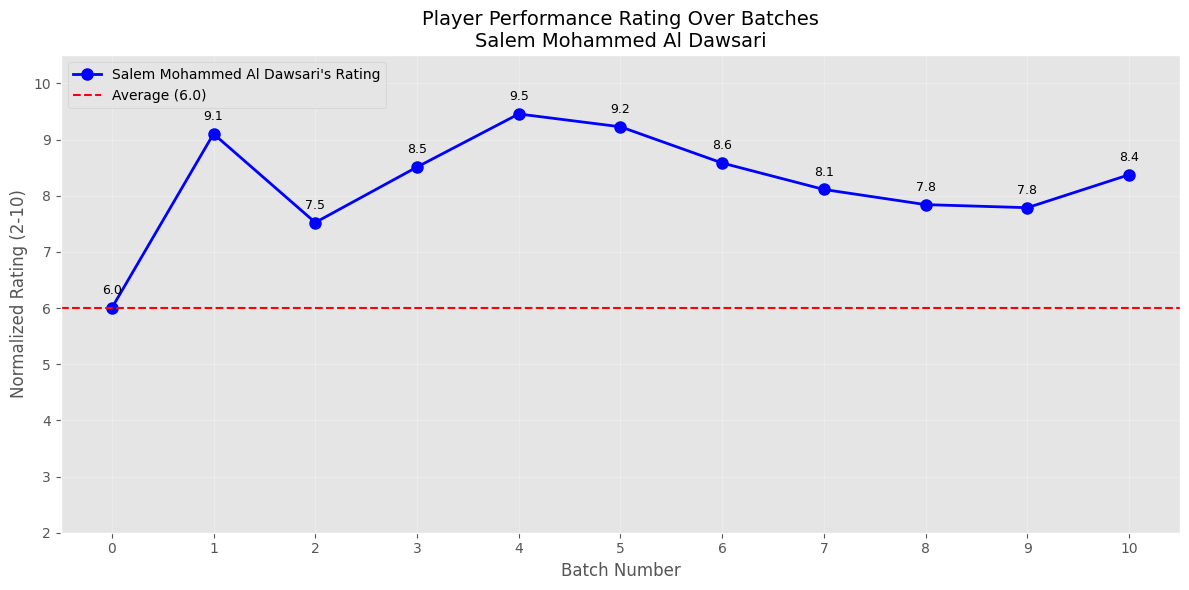

In [35]:
import matplotlib.pyplot as plt

# 1. Select player to visualize
player_name ="Salem Mohammed Al Dawsari"  # Replace with your target player

# 2. Prepare data
if player_name in normalized_history:
    ratings = normalized_history[player_name]
    batches = list(range(len(ratings)))  # Batches 0 to N

    # 3. Create plot
    plt.figure(figsize=(12, 6))
    plt.plot(batches, ratings, 'b-o', linewidth=2, markersize=8, label=f"{player_name}'s Rating")

    # 4. Customize plot
    plt.title(f"Player Performance Rating Over Batches\n{player_name}", fontsize=14)
    plt.xlabel("Batch Number", fontsize=12)
    plt.ylabel("Normalized Rating (2-10)", fontsize=12)
    plt.axhline(y=6.0, color='r', linestyle='--', label="Average (6.0)")
    plt.ylim(2, 10.5)
    plt.xticks(batches)
    plt.grid(True, alpha=0.3)

    # 5. Annotate points
    for i, (batch, rating) in enumerate(zip(batches, ratings)):
        plt.annotate(f"{rating:.1f}",
                    (batch, rating),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=9)

    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print(f"Player '{player_name}' not found in tracking data.")

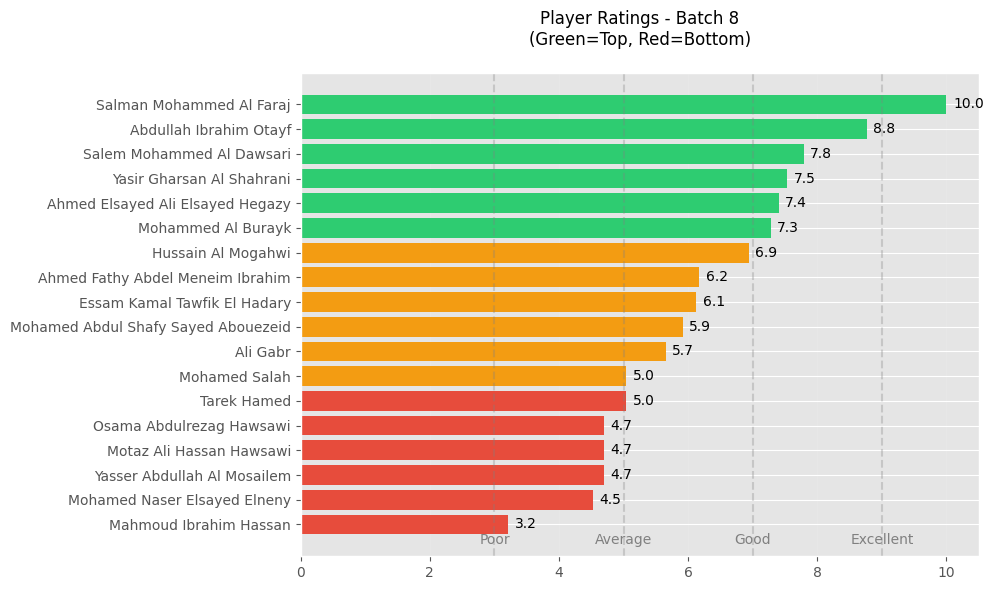

In [33]:
def plot_live_ratings(batch_num=9):
    """Live match view with top=green, bottom=red coloring"""
    # 1. Prepare ratings data
    ratings = [(p, s[batch_num+1]) for p, s in normalized_history.items()
              if len(s) > batch_num+1]

    if not ratings:
        print(f"No ratings found for batch {batch_num}")
        return

    # Sort from BEST (high rating) to WORST (low rating)
    ratings.sort(key=lambda x: x[1], reverse=True)
    players, scores = zip(*ratings)

    # 2. Create gradient coloring (top=green to bottom=red)
    n_players = len(players)
    colors = [
        '#2ecc71' if i < n_players//3 else  # Top 1/3 = green
        '#f39c12' if i < 2*n_players//3 else  # Middle = orange
        '#e74c3c'  # Bottom = red
        for i in range(n_players)
    ]

    # 3. Create plot
    plt.figure(figsize=(10, max(6, n_players*0.3)))  # Dynamic height
    bars = plt.barh(players[::-1], scores[::-1], color=colors[::-1], height=0.8)

    # 4. Add rating labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}',
                va='center', ha='left',
                fontsize=10)

    # 5. Formatting
    plt.title(f"Player Ratings - Batch {batch_num}\n(Green=Top, Red=Bottom)",
             pad=20, fontsize=12)
    plt.xlim(0, 10.5)

    # Threshold lines with labels
    for x, label in [(3, "Poor"), (5, "Average"), (7, "Good"), (9, "Excellent")]:
        plt.axvline(x=x, color='grey', alpha=0.3, linestyle='--')
        plt.text(x, 0.02, label,
                transform=plt.gca().get_xaxis_transform(),
                ha='center', va='bottom', color='grey')

    plt.grid(axis='x', alpha=0.1)
    plt.tight_layout()
    plt.show()

# Example usage
plot_live_ratings(8)  # Replace with your batch number